


#Primera entrega de DATA SCIENCE II CODERHOUSE

#Pierre Cabot

#Predicción de ACV (clasificación binaria)

# 1) Dependencias

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#2) Introducción

 **Descripción:**

 El siguiente dataset fue obtenido de la dirección https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Tiene como por título en inglés "Stroke Prediction Dataset".

 **Contexto:**

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte a nivel mundial y es responsable de aproximadamente el 11% del total de muertes.

**Alcance:**

Este trabajo esta dirigido a profesionales de la salud con el fin de informar y dar a conocer las principales variables que afectan a una persona a la hora de sufrir un ACV.

**Motivación:**

Los problemas de salud nos afecta tanto directa o indirectamente, por lo tanto es desafiante el hecho de que se posean datos respecto a estos accidentes, con el fin de preveenir de que nos ocurra en el caso de estar en condiciones de riesgo.

**Hipótesis/Preguntas**

Factores de riesgo como el fumar o haber fumado durante los años de vida aumenta la probabilidad de tener un ictus y el pertencer a la población femenina aumenta aún más.

¿Puede el estar casado o divorciado aumentar el riesgo de sufrir un ACV?
¿Aquellos que viven en la ciudad sufren más accidentes que los de la zona rural?





#3) Descripción de variables

1) ID: identificador único

2) Gender: "Masculino", "Femenino" u "Otro"

3) Age: edad del paciente

4) Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) Ever_married: "No" o "Sí"

7) Work_type: "niños", "Govt_jov", "Never_worked", "Privado" o "Autónomo"

8) Residence_type: "Rural" o "Urbana"

9) Avg_glucose_level: nivel promedio de glucosa en sangre

10) BMI: índice de masa corporal

11) Smoke_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*

12) Stroke: 1 si el paciente tuvo un ictus o 0 si no

#4) Data acquisition

In [110]:
url = 'https://github.com/PierreCabot/PierreCODER/raw/main/healthcare-dataset-stroke-data.csv'
df =pd.read_csv(url)
#Se sube el dataset desde github

#5) Data exploration

In [111]:
df.shape

(5110, 12)

In [112]:
#El dataset posee 5110 registros con 12 columnas

In [113]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Se consulta cuales son cada una de estas columnas

In [114]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
duplicados = df['id'].duplicated().sum()
print(duplicados)

0


No existen datos duplicados

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [117]:
# Se puede observar al investigar las características de los datos, de que en la columna "bmi" hay menos datos que los registros totales, esto nos está dando un indicio de la faltante de datos

In [118]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [119]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [120]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Existe un valor de género definido como "other" que será eliminado en posterior tratamiento


#6) Data wrangling


In [121]:
df1=df.drop(['id'],axis=1) #Se elimina la columna ID del dataset
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [122]:
df2=df1[df1['gender'] != 'Other'] #se elimina la fila con género "other" ya que en la visualización de datos no aporta significado
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


##6.1) Datos nulos

In [123]:
#Total de valores faltantes en registros de "bmi"
df2.isna().sum().sort_values(ascending = False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

201 valores de  BMI sin registro. Proporción de nulos relativamente baja

In [124]:
IMC= df2["bmi"]


Se definió una variable IMC, como lo dicen sus siglas en español, índice de masa corporal, con el fin de sustituir los registros faltantes

In [125]:
IMC= IMC.fillna(IMC.median())

In [126]:
# Calculo el coeficiente de variación de la columna "BMI"
cv = (IMC.std() / IMC.mean()) * 100

print("Coeficiente de variación de 'BMI':", int(cv))

Coeficiente de variación de 'BMI': 26


In [127]:
#La dispersión de los datos es moderada, por lo que se sustituye los valores nulos por la media de los restantes

In [128]:
df21 = df2.drop('bmi', axis = 1) #elimino la columna bmi del df original que contienen valores faltantes.
df3=pd.concat([df21,IMC], axis=1) #construyo un nuevo df con los valores de bmi sin datos faltantes mediante la función pd.concat
df3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.6
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.6


In [129]:
df3.isnull().sum().sort_values(ascending = False)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
bmi                  0
dtype: int64

Los valores faltantes ahora son 0

#7) Exploratory data analysis

In [130]:
df3.describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,0.048738,28.863300
std,22.613575,0.296633,0.226084,45.285004,0.215340,7.699785
min,0.080000,0.000000,0.000000,55.120000,0.000000,10.300000
25%,25.000000,0.000000,0.000000,77.240000,0.000000,23.800000
50%,45.000000,0.000000,0.000000,91.880000,0.000000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,0.000000,32.800000
max,82.000000,1.000000,1.000000,271.740000,1.000000,97.600000


Se procede a definir las siguientes variables como categóricas

In [131]:
df3['hypertension'] = df3['hypertension'].astype('category')  # corresponde a data wrangling o EDA?
df3['heart_disease'] = df3['heart_disease'].astype('category')
df3['stroke']=df3['stroke'].astype('category')
df3['gender']=df3['gender'].astype('category')
df3.describe(include='category')

,gender,hypertension,heart_disease,stroke
count,5109,5109,5109,5109
unique,2,2,2,2
top,Female,0,0,0
freq,2994,4611,4833,4860


In [132]:
df3.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.863300
std,22.613575,45.285004,7.699785
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


## 7.1) Análisis univariado

Análisis de variables categóricas

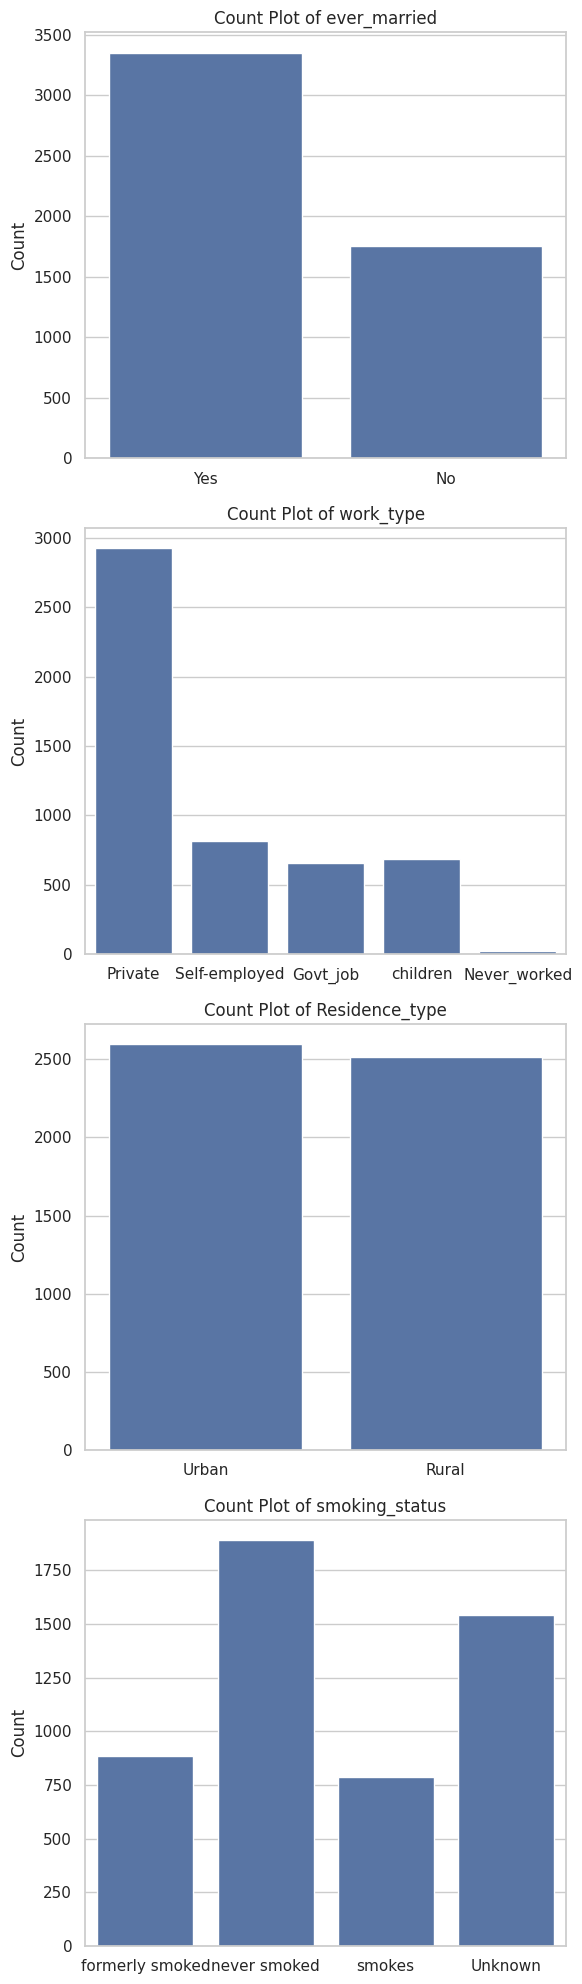

In [133]:
variables_categoricas = df3.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(len(variables_categoricas), 1, figsize=(6, len(variables_categoricas) * 5))

for i, col in enumerate(variables_categoricas):
    sns.countplot(x=df3[col], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Análisis de variables continuas

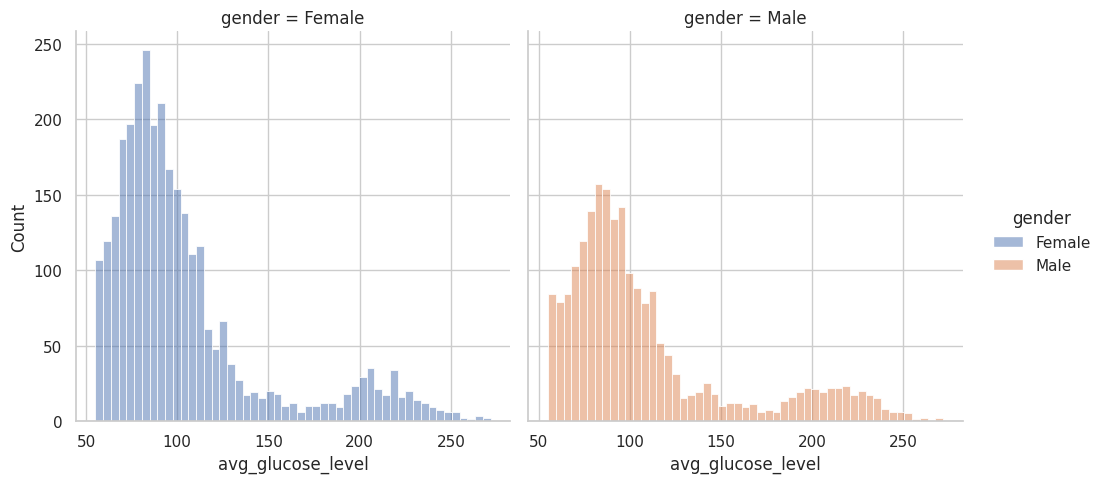

In [134]:
sns.displot(data=df3, x="avg_glucose_level", hue="gender", col="gender")   # se grafica la distribución de la variable "bmi" y "avg_glucose_level" tanto para hombre como para mujer. Existe el género "otro" pero se omite para el análsis

Se hace llamativo el tipo de distribución de la glucosa en sangre de las personas registradas. No se posee información en que condiciones fueron tomadas estas medidas, si en ayunas o por ej: 2 horas después de comer. Un valor de glucosa en sangre de 200 mg/dl está muy por encima de lo que una persona sana tendría en ayunas (alrededor de 100-125 mg/dl) o después de dos horas de comer de 140 a 199 mg/dl. Valores por encima de esto son atípicos, pero su presencia podría estar directamente relacionada con una pre-diabetes o diabetes en sí. Valores altos de glucosa en sangre tienen una alta incidencia en el riesgo de contraer un ACV por lo que estos valores no pueden ser descartados del dataset.

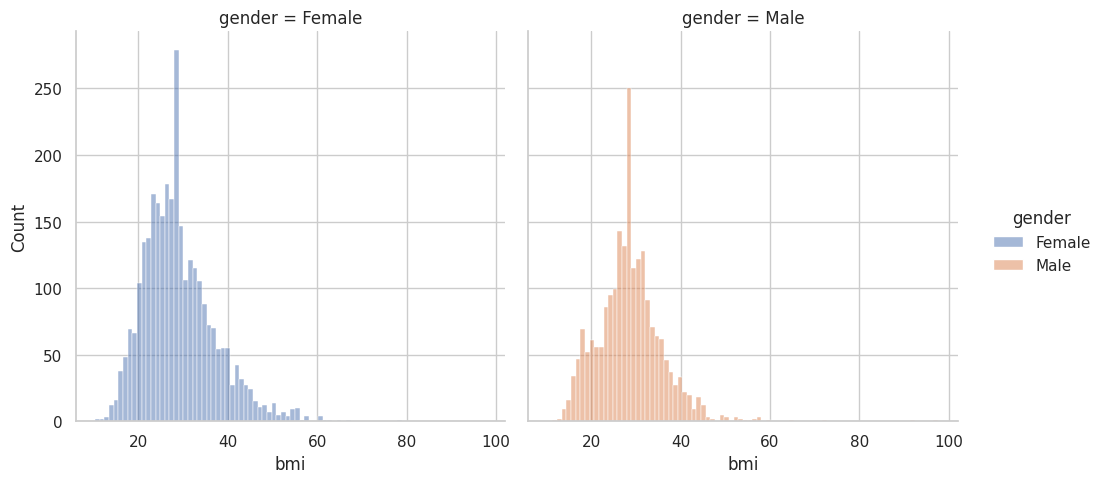

In [135]:
sns.displot(data=df3, x="bmi", hue="gender", col="gender")

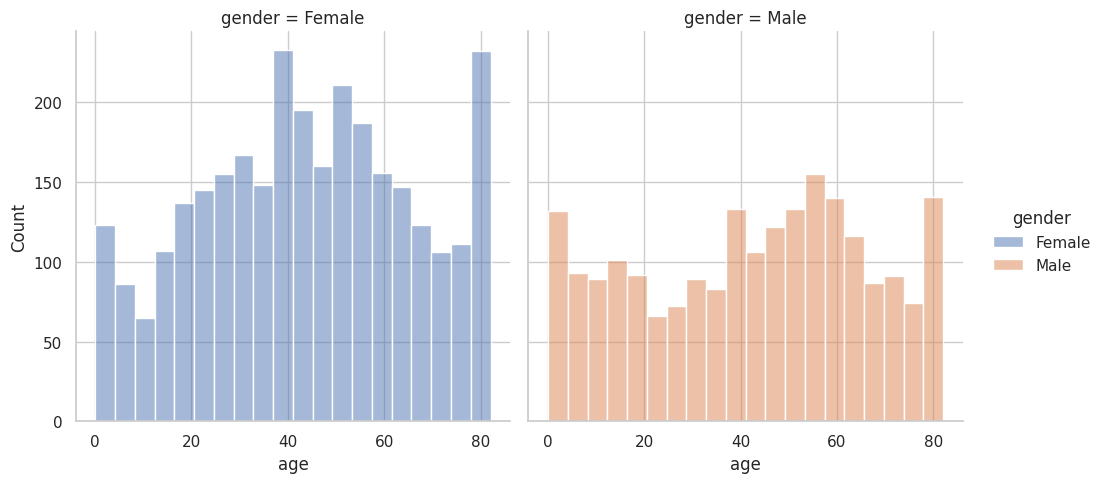

In [136]:
sns.displot(data=df3, x="age", hue="gender", col="gender")

###7.1.1) Detección de outliers

Text(0.5, 0, 'bmi')

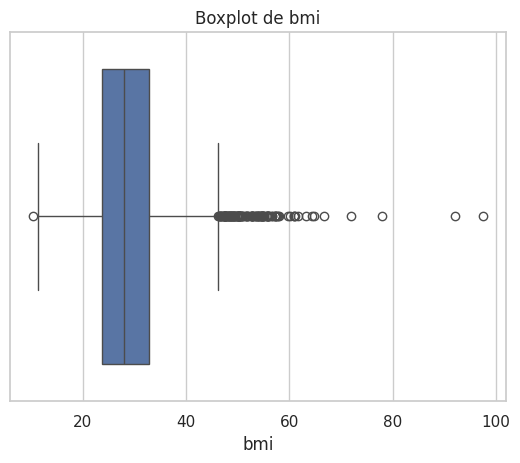

In [137]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3.bmi)
plt.title('Boxplot de bmi')
plt.xlabel('bmi')

In [138]:
# Detección de outliers
median = np.median(df3.bmi)
mad = np.median(np.abs(df3.bmi - median))

threshold = 3.5

outliers = df3.bmi[np.abs(df3.bmi- median) / mad > threshold]

print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
21      48.9
30      44.2
66      47.5
79      45.9
80      44.1
        ... 
4976    46.0
5009    49.5
5015    45.0
5057    47.6
5103    46.9
Name: bmi, Length: 204, dtype: float64


###7.1.2) Medidas de asimetría y kurtosis

Se realiza un análisis sobre la variable "bmi"

In [139]:
import scipy.stats as stats
stats.describe(df3.bmi)

DescribeResult(nobs=5109, minmax=(10.3, 97.6), mean=28.863300058719908, variance=59.28668926409749, skewness=1.0876092458345539, kurtosis=3.6302950809808596)

Distribución fuertemente asimétrica

###7.1.3) Test de Shapiro

In [140]:
# Realizo el test de Shapiro sobre los datos de "bmi"
p_value = stats.shapiro(df3.bmi)

# Imprimo los resultados

print("Valor p:", p_value[1])

# Comparar con nivel de significancia de 0.05
nivel_significancia = 0.05

if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 2.3314648795176055e-38
Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5109.
  res = hypotest_fun_out(*samples, **kwds)


##7.2) Análisis bivariado

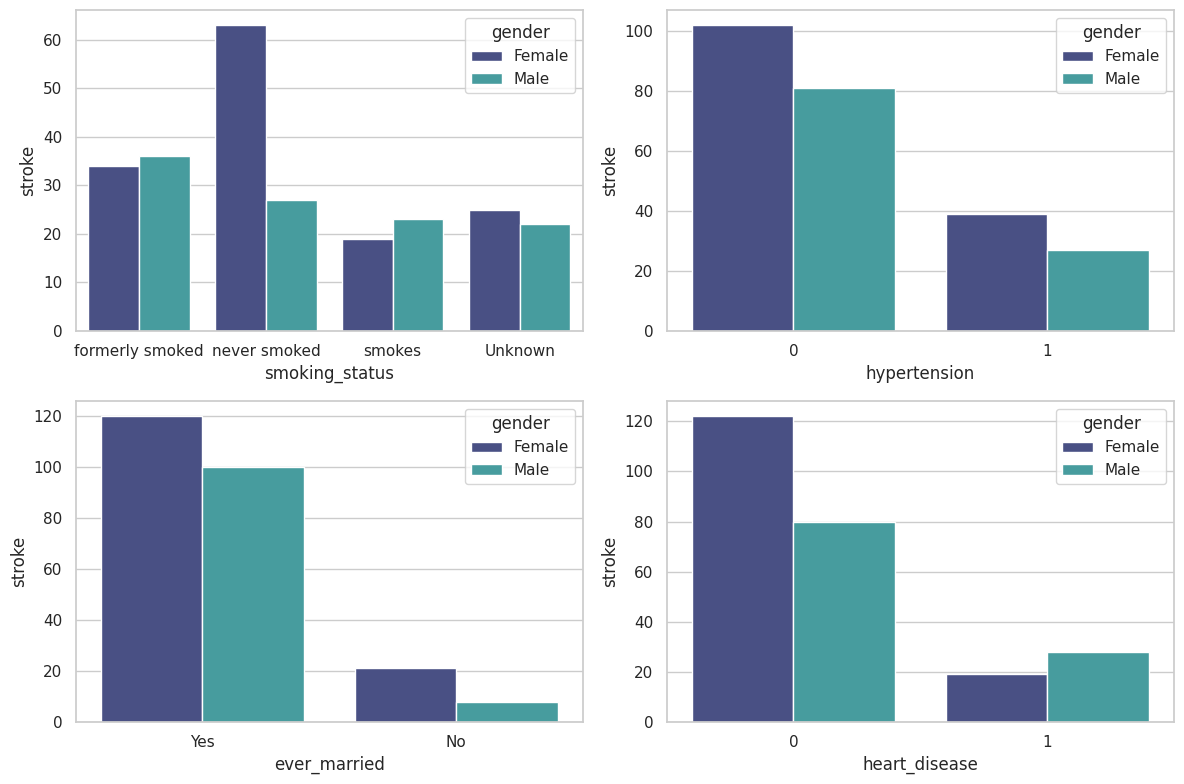

In [141]:
#Análsis de variables categóricas en relación al género y la frecuencia de ictus("stroke")
df3["stroke"]= df3["stroke"].astype(int)
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.barplot(data= df3, x="smoking_status", y="stroke", hue="gender", ax=axs[0,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df3, x="hypertension", y="stroke", hue="gender", ax=axs[0,1], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df3, x="ever_married", y="stroke", hue="gender", ax=axs[1,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df3, x="heart_disease", y="stroke", hue="gender", ax=axs[1,1], errorbar=None, palette= "mako", estimator=np.sum)
f.tight_layout()

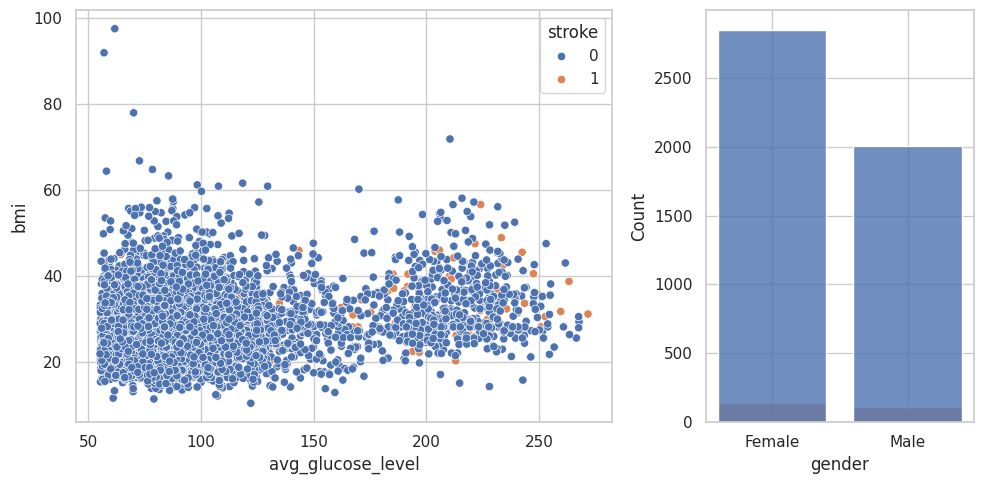

In [142]:
f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[2, 1]))
sns.scatterplot(data= df3, x="avg_glucose_level", y="bmi", hue="stroke", ax=axs[0])
sns.histplot(data= df3, x="gender", hue="stroke", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

No existe a simple vista, o no hay suficiente evidencia en los datos para establecer una relación entre IBM y avg_glucose level.

Son varias las conclusiones que se pueden sacar a partir de estos cuatro gráficos de barras. De manera general, la frecuencia de ictus es mayor en las mujeres en todos los casos. Predomina esta tendencia en los datos para las mujeres que nunca fumaron y no tienen hipertensión. Se muestra lo mismo para aquellas que alguna vez estuvieron casadas y tienen alguna enfermedad cardíaca.
La frecuencia de ictus en los hombres es visiblemente menor que en las mujeres.
Se da que en aquellos hombres que son ex-fumadores, mayor tendencia a sufrir un ACV a aquellos que nunca fumaron.

Se puede inferir visualmente que a mayor nivel de glucosa existe una mayor predisposición a sufrir un ACV.

**Se realiza un estudio por género**

In [143]:
#definimos dos nuevos datasets, ahora separándolos por género
women = df3[df3['gender']=='Female']
men = df3[df3['gender']=='Male']

print("Cantidad de mujeres", len(women))
print("Cantidad de hombres", len(men))


Cantidad de mujeres 2994
Cantidad de hombres 2115


Se calcula tanto la cantidad de mujeres como de hombres en el registro con el fin de analizar más profundamente los datos.

Text(0.5, 1.0, 'Hombres')

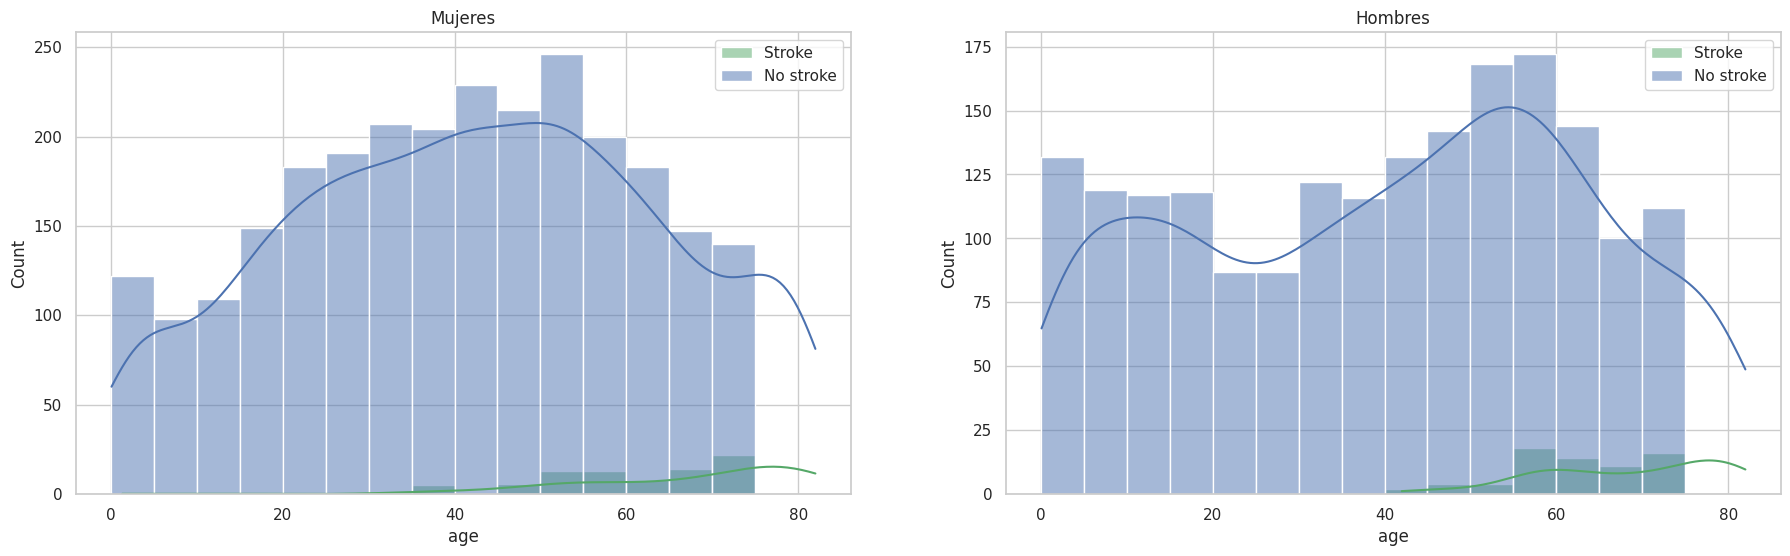

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22, 6))
ax = sns.histplot(women[women['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

En estos dos histogramas se puede observar que aquellos que sufrieron un accidente son mayores de 40 años, esto tanto para los hombres como para las mujeres. Por lo tanto se podría hacer una suposición, que a mayor edad, mayor es la probabilidad de tener un ictus.

In [145]:
Cantidaddemujeresconictus= df3[ (df3['stroke']==1) & (df3['gender']=='Female')]
print( "Cantidad de mujeres con ictus" , len(Cantidaddemujeresconictus))

Cantidad de mujeres con ictus 141


In [146]:
Cantidaddehombresconictus= df3[ (df3['stroke']==1) & (df3['gender']=='Male')]
print( "Cantidad de hombres con ictus" , len(Cantidaddehombresconictus))

Cantidad de hombres con ictus 108


In [147]:
Cantidaddehombres = df3[df3['gender']=='Male']
Cantidaddemujeres =df3[df3['gender']=='Female']
Porcentajedehombresconictus= (len(Cantidaddehombresconictus)/len(Cantidaddehombres))*100
Porcentajedemujeresconictus= (len(Cantidaddemujeresconictus)/len(Cantidaddemujeres))*100
print("Cantidad de hombres",len(Cantidaddehombres))
print("Cantidad de mujeres",len(Cantidaddemujeres))
print("Porcentaje de hombres con ictus",int(Porcentajedehombresconictus))
print("Porcentaje de mujeres con ictus",int(Porcentajedemujeresconictus))

Cantidad de hombres 2115
Cantidad de mujeres 2994
Porcentaje de hombres con ictus 5
Porcentaje de mujeres con ictus 4


El porcentaje de hombres y mujeres registrados con ictus son similares pero muy bajo en relación al total de datos recabados. Hay que verificar estadisticamente, si es significativa o no esta diferencia.

---



###7.2.0) Test Chi-cuadrado

In [148]:
tabla_contingencia = pd.crosstab(df3['stroke'],df3['gender'])
tabla_contingencia

gender,Female,Male
stroke,,
0,2853,2007
1,141,108


In [149]:
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Chi-squared: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas: \n{expected}")

if p < 0.05:
    print("Hay una diferencia significativa en la ocurrencia de ACV entre los géneros.")
else:
    print("No hay una diferencia significativa en la ocurrencia de ACV entre los géneros.")

Chi-squared: 0.340002536046177
Valor p: 0.5598277580669416
Grados de libertad: 1
Frecuencias esperadas: 
[[2848.07985907 2011.92014093]
 [ 145.92014093  103.07985907]]
No hay una diferencia significativa en la ocurrencia de ACV entre los géneros.


In [150]:
Dataset_solo_mujeres=df3[df3['gender']=='Female']

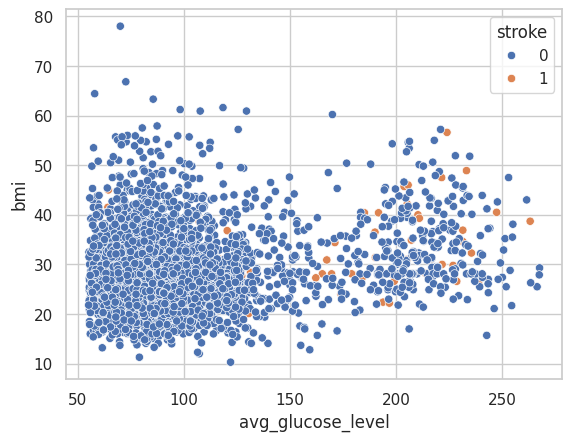

In [151]:
import matplotlib.pyplot as plt
sns.scatterplot(data= Dataset_solo_mujeres, x="avg_glucose_level", y="bmi", hue="stroke")   # se grafica para el caso de las mujeres si hay una relación entre "bmi" y "avg_glucose_level"
f.tight_layout()

In [152]:
#No es evidente visualmente una relación lineal entre las variables "IBM" y "avg_glucose_level" para el género femenino ya sea para aquellas que tuvieron ictus y que no.

In [153]:
Dataset_solo_hombres=df3[df3['gender']=='Male']

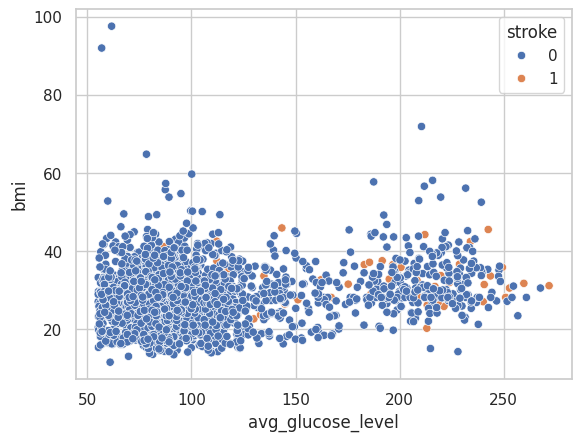

In [154]:
import matplotlib.pyplot as plt
sns.scatterplot(data= Dataset_solo_hombres, x="avg_glucose_level", y="bmi", hue="stroke")
f.tight_layout()

La edad tiene una muy buena correlación a la hora de predecir un ictus.

###7.2.1) Matriz de correlación

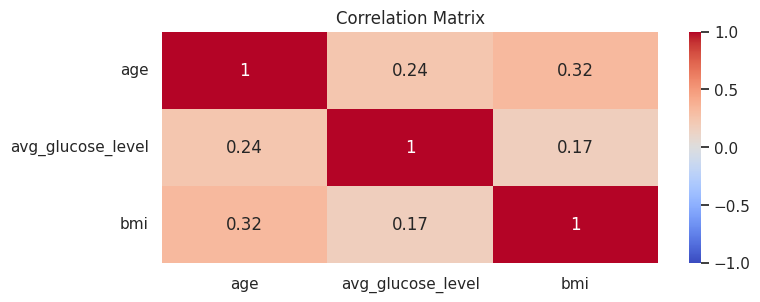

In [155]:
variables_numericas = df3.select_dtypes(include=['float64']).columns.tolist()
correlation_matrix = df3[variables_numericas].corr()
plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

###7.2.2) Matriz de correlación de Spearman

In [156]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

Se estudia la relación entre las variables categóricas nominales del dataset y las variables continuas

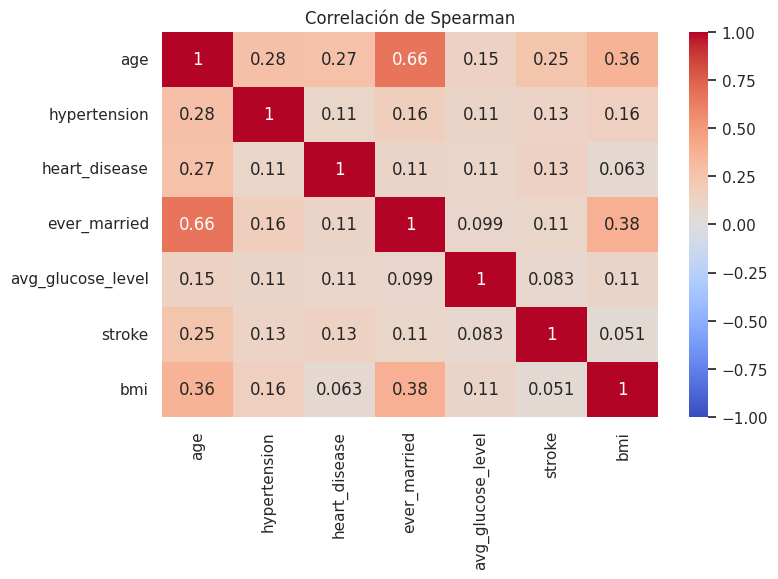

In [157]:
for col in df3.columns:
    if df3[col].dtype == 'object':
        unique_values = df3[col].unique()
        if set(unique_values) == {'Yes', 'No'}:
            df3[col] = df3[col].map({'Yes': 1, 'No': 0})

df4=df3.drop(['gender','work_type','Residence_type','smoking_status'],axis=1)

spearman_corr = df4.corr(method='spearman')

plt.figure(figsize=(8, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Spearman')
plt.show()

#8) Feature engineering

##8.1) Feature binning

Metodología 1 - Estandarizo las edades. Separo las edades en rangos de 0 a 20, 20 a 40 y 40 a 60 y 60 a 80 años con el fin de mejorar la performance de los algoritmos.

In [158]:
bins = [0, 25, 50, 80]
labels = ['0-25', '26-50', '51-80',]

# Creamos una nueva columna 'age_range' con los rangos de edad
df3['rango_de_edad'] = pd.cut(df3['age'], bins=bins, labels=labels, right=True)

df4=df3.drop(['age'],axis=1)
df4.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi,rango_de_edad
0,Male,0,1,1,Private,Urban,228.69,formerly smoked,1,36.6,51-80
1,Female,0,0,1,Self-employed,Rural,202.21,never smoked,1,28.1,51-80
2,Male,0,1,1,Private,Rural,105.92,never smoked,1,32.5,51-80
3,Female,0,0,1,Private,Urban,171.23,smokes,1,34.4,26-50
4,Female,1,0,1,Self-employed,Rural,174.12,never smoked,1,24.0,51-80


##8.2) One-hot enconding

<Axes: >

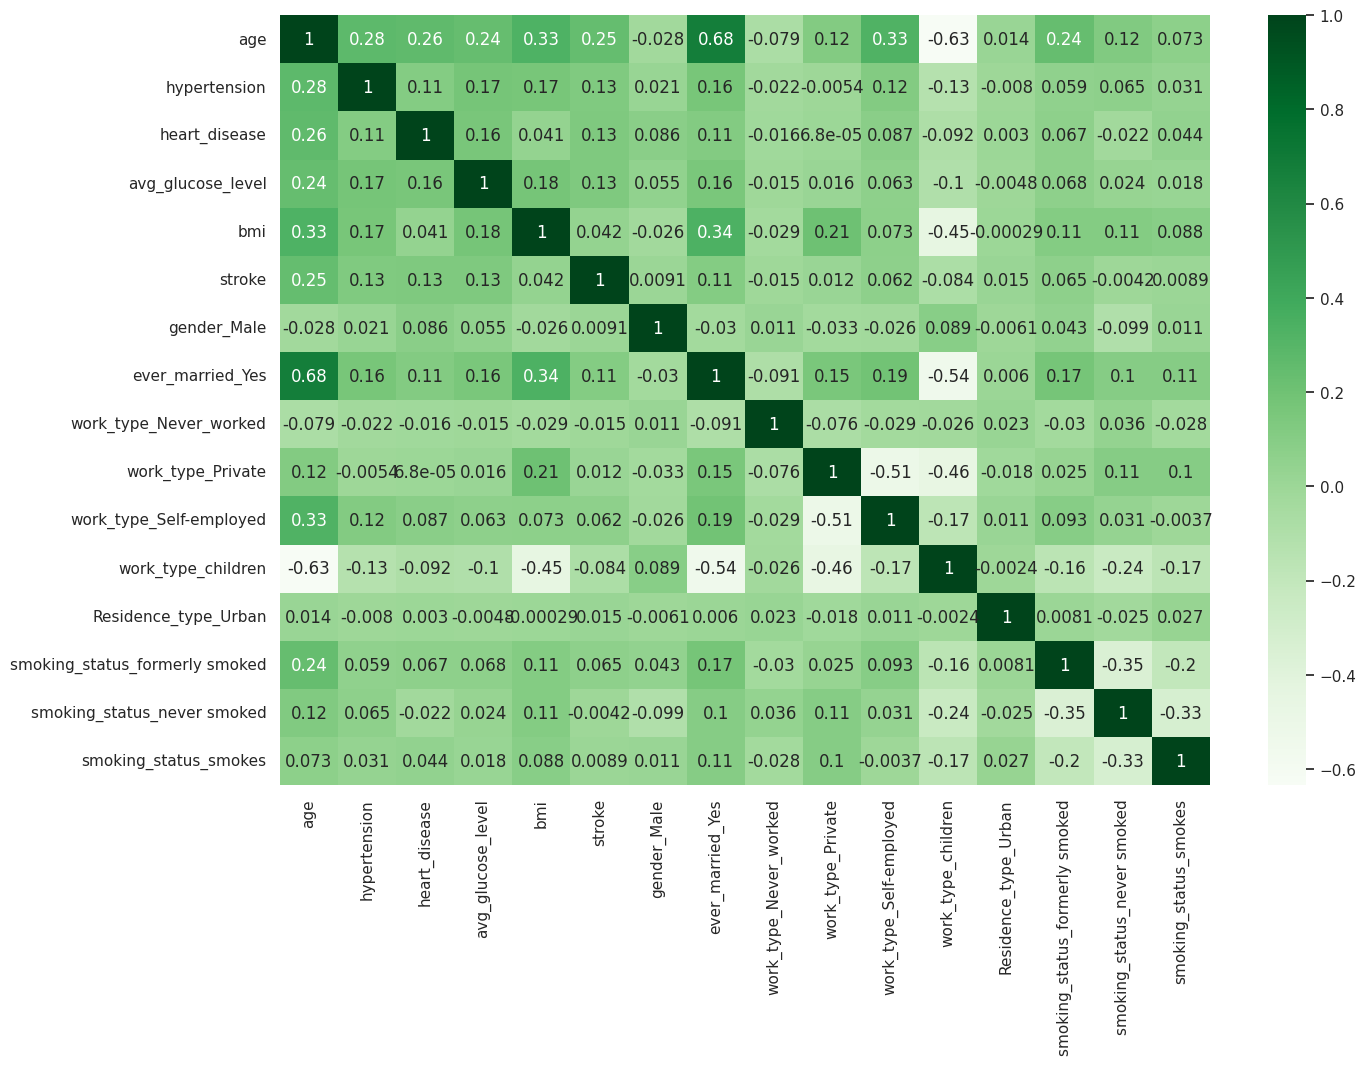

In [159]:
df5=pd.get_dummies(df2,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],
               drop_first=True)
plt.figure(figsize=(15,10))
sns.heatmap(df5.corr(),annot=True,cmap='Greens')